**Import files and packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving compas.csv to compas.csv


In [ ]:
df_compas = pd.read_csv("compas.csv")
df_compas.head()

,case_number,first_name,last_name,sex,age,age_category,race,juvenile_felony_count,juvenile_misdemeanors_count,juvenile_other_count,priors_count,charge_description,charge_degree,offense_date,screening_date,jail_in,jail_out,type_of_assessment,score,score_text,is_recidivist,prediction
0,13011352CF10A,miguel,hernandez,Male,69,Greater than 45,Other,0,0,0,0,Aggravated Assault w/Firearm,F,8/13/2013,8/14/2013,8/13/2013 6:03,8/14/2013 5:41,Risk of Recidivism,1,Low,0,0
1,13001275CF10A,kevon,dixon,Male,34,25 - 45,African-American,0,0,0,0,Felony Battery w/Prior Convict,F,1/26/2013,1/27/2013,1/26/2013 3:45,2/5/2013 5:36,Risk of Recidivism,3,Low,1,0
2,13005330CF10A,ed,philo,Male,24,Less than 25,African-American,0,0,1,4,Possession of Cocaine,F,4/13/2013,4/14/2013,4/13/2013 4:58,4/14/2013 7:02,Risk of Recidivism,4,Low,1,0
3,13022355MM10A,marsha,miles,Male,44,25 - 45,Other,0,0,0,0,Battery,M,11/30/2013,11/30/2013,11/30/2013 4:50,12/1/2013 12:28,Risk of Recidivism,1,Low,0,0
4,14002304CF10A,edward,riddle,Male,41,25 - 45,Caucasian,0,0,0,14,Possession Burglary Tools,F,2/18/2014,2/19/2014,2/18/2014 5:08,2/24/2014 12:18,Risk of Recidivism,6,Medium,1,0


In [ ]:
df_doj = pd.read_csv("DOJ_summary_statistics.csv")
df_doj.head()

,Offenses,All races,White,Black,American Indian,Asian,Year
0,Murder and nonnegligent manslaughter,11200,5540,5430,120,110,2010
1,Forcible rape,20090,13210,6310,290,280,2010
2,Robbery,112300,48320,62020,790,1190,2010
3,Aggravated assault,408490,260770,136400,6100,5220,2010
4,Burglary,289770,195780,88740,2500,2750,2010


In [ ]:
df_doj['Offenses']

0      Murder and nonnegligent manslaughter
1                             Forcible rape
2                                   Robbery
3                        Aggravated assault
4                                  Burglary
                       ...                 
247                                Vagrancy
248     All other offenses (except traffic)
249                    Curfew and loitering
250                    Property Crime Index
251                         Violent crimes*
Name: Offenses, Length: 252, dtype: object

**Plot age - recidivism - score**

In [ ]:
unique_ages = df_compas['age_category'].unique()
r = np.zeros((10,6))
for (a,b,c) in zip(df_compas['age_category'],df_compas['is_recidivist'],df_compas['score']):
    r[c-1,3*b+np.where(a == unique_ages)[0]] += 1
print(r)
print(unique_ages)

[[896. 793.   4. 154. 155.   2.]
 [160. 666. 107.  46. 215.  35.]
 [ 91. 379. 201.  46. 171.  73.]
 [ 73. 331. 188.  43. 174. 117.]
 [ 61. 284. 133.  32. 168.  99.]
 [ 58. 211. 121.  46. 173. 103.]
 [ 50. 195. 109.  42. 183.  93.]
 [ 30. 153.  82.  31. 186.  95.]
 [ 30. 140.  81.  29. 189.  96.]
 [  5. 109.  55.  11. 153.  94.]]
['Greater than 45' '25 - 45' 'Less than 25']


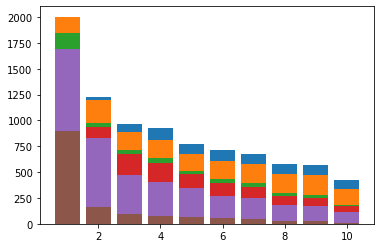

In [ ]:
for i in range(6):
    plt.bar(range(1,11),np.sum(r[:,:(6-i)],axis=1),label=unique_races[6-i-1])

**Plot specific race - recidivism - score**

In [ ]:
r = np.zeros((10,4))
for (a,b,c) in zip(df_compas['race'],df_compas['is_recidivist'],df_compas['score']):
    r[c-1,2*b+(1 if a == "Caucasian" else 0)] += 1 # Caucasian, African-American
k = np.sum(r,axis=0)
print(k)
print(k[2]/k[0], k[3]/k[1])

[3546. 2250. 2142.  912.]
0.6040609137055838 0.4053333333333333


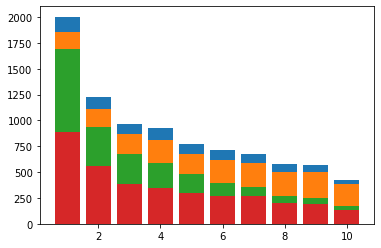

In [ ]:
for i in range(4):
    plt.bar(range(1,11),np.sum(r[:,:(4-i)],axis=1),label=unique_races[4-i-1])

**Plot recidivism - score**

In [ ]:
r = np.zeros((10,2))
for (a,b) in zip(df_compas['score'],df_compas['is_recidivist']):
    r[a-1,b] += 1
print(r)

[[1693.  311.]
 [ 933.  296.]
 [ 671.  290.]
 [ 592.  334.]
 [ 478.  299.]
 [ 390.  322.]
 [ 354.  318.]
 [ 265.  312.]
 [ 251.  314.]
 [ 169.  258.]]


Text(0.5, 1.0, 'Recidivist in function of score')

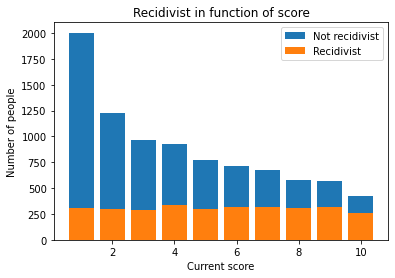

In [ ]:
p1 = plt.bar(range(1,11),r[:,0]+r[:,1],label="Not recidivist")
p2 = plt.bar(range(1,11),r[:,1],label="Recidivist")
plt.legend()
plt.xlabel("Current score")
plt.ylabel("Number of people")
plt.title('Recidivist in function of score')

**Length of time in jail**

(array([7.899e+03, 3.920e+02, 1.740e+02, 9.400e+01, 8.900e+01, 6.100e+01,
        3.100e+01, 2.400e+01, 2.000e+01, 1.600e+01, 1.200e+01, 1.500e+01,
        7.000e+00, 3.000e+00, 4.000e+00, 3.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-4.87500000e-01,  4.25813194e+01,  8.56501389e+01,  1.28718958e+02,
         1.71787778e+02,  2.14856597e+02,  2.57925417e+02,  3.00994236e+02,
         3.44063056e+02,  3.87131875e+02,  4.30200694e+02,  4.73269514e+02,
         5.16338333e+02,  5.59407153e+02,  6.02475972e+02,  6.45544792e+02,
         6.88613611e+02,  7.31682431e+02,  7.74751250e+02,  8.17820069e+

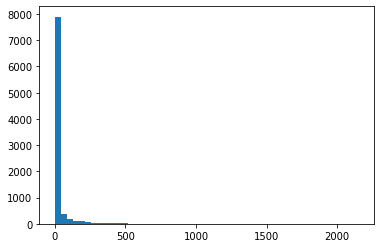

In [ ]:
plt.hist([i.total_seconds()/(60*60*24) for i in pd.to_datetime(df_compas['jail_out'])-pd.to_datetime(df_compas['jail_in'])],bins=50)


**Race in function of score**

In [ ]:
unique_races = df_compas['race'].unique()

In [ ]:
dataraph = np.zeros((6,10))
for (a,b) in zip(df_compas['race'],df_compas['score']):
    dataraph[np.where(a == unique_races),b-1] += 1
print(dataraph)

[[226.  99.  45.  53.  31.  28.  15.   8.   9.   9.]
 [519. 487. 420. 446. 398. 430. 446. 409. 406. 319.]
 [947. 483. 381. 357. 288. 207. 165. 138. 121.  75.]
 [284. 147. 105.  67.  55.  40.  42.  18.  28.  20.]
 [ 24.   8.   5.   0.   4.   3.   1.   3.   0.   1.]
 [  4.   5.   5.   3.   1.   4.   3.   1.   1.   3.]]


Text(0.5, 1.0, 'Race in function of score')

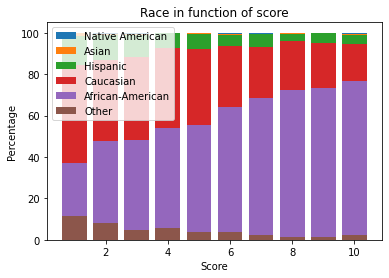

In [ ]:
dataraphplot = dataraph/np.sum(dataraph,axis=0).reshape((1,10))
for i in range(6):
    plt.bar(range(1,11),100*np.sum(dataraphplot[:(6-i),:],axis=0),label=unique_races[6-i-1])
plt.legend()
plt.xlabel("Score")
plt.ylabel("Percentage")
plt.title('Race in function of score')


**Simple least square model, bias**

In [ ]:
learnFr = 7000
ind = np.random.choice(8850, 8850)
ind_tr = ind[:learnFr]
ind_te = ind[learnFr:]

categories = np.zeros((8850, 1+2+1+5+1+1))
unique_sexes = df_compas['sex'].unique()
unique_ages = df_compas['age_category'].unique()
unique_charges = df_compas['charge_degree'].unique()
unique_races = df_compas['race'].unique()
for i, sex, age, sev, race, prior in zip(range(8850),df_compas['sex'], df_compas['age_category'], df_compas['charge_degree'], df_compas['race'], df_compas['priors_count']):
    categories[i,np.where(sex == unique_sexes[0])[0]] = 1
    categories[i,1+np.where(age == unique_ages[:2])[0]] = 1
    categories[i,3+np.where(sev == unique_charges[0])[0]] = 1
    categories[i,4+np.where(race == unique_races[:5])[0]] = 1
    categories[i,-2] = prior
    categories[i,-1] = 1

x = np.linalg.lstsq(categories[ind_tr,:],df_compas['score'][ind_tr],rcond=None)[0]

In [ ]:
for i,j in zip(x,np.concatenate( (unique_sexes[:1],unique_ages[:2],unique_charges[:1],unique_races[:5],["prior","constant"]))):
    print(j,"\t",i)
print(unique_sexes[1],",",unique_ages[2],",",unique_charges[1],",",unique_races[5],"are zero")

Male 	 -0.1345130709550963
Greater than 45 	 -3.3404316963626273
25 - 45 	 -1.8670893356360194
F 	 0.716935719333891
Other 	 -1.0223655658896067
African-American 	 0.5250950356288548
Caucasian 	 -0.14860453920452826
Hispanic 	 -0.5370688827096978
Asian 	 -0.44773705569922584
prior 	 0.277032791497672
constant 	 4.82669638942986
Female , Less than 25 , M , Native American are zero


In [ ]:
correctness = np.zeros((14,10))
for i,j in zip(range(8850-7000),ind_te):
    correctness[int(round(categories[j,:].dot(x))), df_compas['score'][j]-1] += 1
print(correctness)


[[  8.   0.   1.   0.   0.   0.   0.   0.   0.   0.]
 [100.   9.   3.   1.   1.   1.   0.   0.   0.   0.]
 [104.  31.  14.  10.   9.   6.   6.   4.   1.   0.]
 [126.  95.  55.  47.  34.  24.  13.   9.   4.   1.]
 [ 67.  80.  44.  51.  39.  22.  27.  19.  17.   5.]
 [ 12.  27.  35.  58.  44.  35.  35.  32.  25.  17.]
 [  3.  14.  38.  41.  37.  37.  47.  25.  25.  20.]
 [  0.   1.   5.   6.   5.  12.  11.  19.  14.  10.]
 [  0.   0.   0.   2.   1.   1.   4.   5.   9.   7.]
 [  0.   0.   0.   0.   0.   2.   2.   6.   7.   5.]
 [  0.   0.   0.   0.   0.   0.   0.   2.   4.   2.]
 [  0.   0.   0.   0.   0.   0.   1.   2.   3.   3.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   1.   2.]
 [  0.   0.   0.   0.   0.   0.   1.   0.   0.   0.]]
